명노아

1. "Anime-dataset-2023.csv"를 활용하여 제작사(Producers) 마다 만들어내는 장르(Genres) 와 애니메이션의 소스 자료(Source) 분석 -> 파이차트로 시각화, Bar of pie를 사용하여 제작사가 만든 장르를 확대하여 인기작품 나열  
사용 컬럼 : Other name, Score, Genres(전처리 필요), Producers, Source  <hr>

2.  "Anime-dataset-2023.csv"를 활용하여 오타쿠 세대를 6개로 분류하여, 세대별 유명했던 애니메이션(Score, Aired) 종류 및 장르 분석 하여 세대별 TOP5 작품 뽑아내기  
-> Bar chart on polar axis로 시각화 및  Grouped bar chart with labels로 시각화  
사용 컬럼 : Aired(전처리 및 열 추가작업 필요), Score, Genres(전처리 필요)  <hr> 

3.  "Anime-dataset-2023.csv","user-details-2023.csv","user-score-2023.csv"를 사용하여 연령 등급(Rating)별 남녀 시청 비율 및 남녀별 등급 부여 차이 분석
-> plot ,Bar chart with gradients 으로 시각화  
사용 컬럼 :   
   Anime-dataset-2023.csv : Rating, anime_id  
   user-details-2023.csv : Gender, Username  
   user-score-2023.csv : Username, anime_id, rating  <hr>

In [172]:
import pandas as pd # 판다스 모듈 갖고오기
import numpy as np # 넘피 모듈 갖고오기
import matplotlib.pyplot as plt # pyplot 모듈 갖고오기
import matplotlib as mpl # matplotlib 패키지 갖고오기
import matplotlib.font_manager as fm # font_manager 갖고오기
import datetime as dt # datatime 모듈 갖고오기

import SampleData as d # SampleData.py의 변수 사용


font_path=r'c:\WINDOWS\Fonts\H2MJRE.TTF' # 한글 출력 설정
myFont=fm.FontProperties(fname=font_path).get_name()
mpl.rc('font',family=myFont)

In [173]:
#1. "Anime-dataset-2023.csv"를 활용하여 제작사(Producers) 마다 만들어내는 장르(Genres) 와 애니메이션의 소스 자료(Source) 분석 -> 파이차트로 시각화, Bar of pie를 사용하여 제작사가 만든 장르를 확대하여 인기작품 나열  
#사용 컬럼 : Other name, Score, Genres(전처리 필요), Producers, Source

Producers_dict_value=[dict() for _ in range(len(d.Producers))] # 제작사별 담당한 장르를 저장할 딕셔너리를 제작사 개수만큼 생성
Producers_dict_key=list(d.Producers) # 제작사 종류 저장
Producers_dict = dict(zip(Producers_dict_key,Producers_dict_value)) # 제작사 종류별 딕셔너리 생성

In [174]:
# Producers나 Genres가 UNKNOWN이 아닌 행 필터링
Producers_Genres=d.anime[["Producers","Genres"]][(d.anime["Producers"]!="UNKNOWN") & (d.anime["Genres"]!="UNKNOWN")] # 결측값 정리
Producers_Genres=Producers_Genres.reset_index(drop=True)
Producers_Genres

,Producers,Genres
0,Bandai Visual,"Action, Award Winning, Sci-Fi"
1,"Sunrise, Bandai Visual","Action, Sci-Fi"
2,Victor Entertainment,"Action, Adventure, Sci-Fi"
3,"Bandai Visual, Dentsu, Victor Entertainment, T...","Action, Drama, Mystery, Supernatural"
4,"TV Tokyo, Dentsu","Adventure, Fantasy, Supernatural"
...,...,...
10203,Youku,"Action, Adventure, Fantasy"
10204,iQIYI,"Action, Comedy"
10205,iQIYI,"Action, Fantasy"
10206,Magic Capsule,"Comedy, Romance"


In [175]:
# 소속사별당 몇 개의 장르 작업을 했는지 보여주는 딕셔너리 생성
for i in range(Producers_Genres.shape[0]):   # 결측값이 제거된 DataFrame의 행 갯수만큼
    Producers_key=Producers_Genres.iloc[i,0] # Producers 열 값 하나하나 받아오기
    Producers_value=Producers_Genres.iloc[i,1] # Genres 열 값 하나하나 받아오기
    for key in Producers_key.split(", ") : # 만약 Producers 값이 여러개면 split으로 쪼개면서 반복
        for value in Producers_value.split(", ") : # Genres의 값도 여러개면 split으로 쪼개면서 반복
            if value not in Producers_dict[key] : # 해당 장르가 특정 Producer에 값이 없으면
                Producers_dict[key].setdefault(value, 1) # 새로운 딕셔너리 값으로 초기화
            else : # 해당 장르가 특정 Producer의 키값 안에 있다면!
                Producers_dict[key][value]+=1 # 1씩 증가
Producers_dict

{'UNKNOWN': {},
 'NHK': {'Adventure': 76,
  'Comedy': 96,
  'Sci-Fi': 24,
  'Action': 23,
  'Fantasy': 72,
  'Romance': 34,
  'Drama': 50,
  'Award Winning': 5,
  'Supernatural': 12,
  'Sports': 28,
  'Girls Love': 1,
  'Gourmet': 8,
  'Mystery': 14,
  'Slice of Life': 60,
  'Horror': 2,
  'Avant Garde': 2},
 'Aniplex': {'Action': 242,
  'Adventure': 89,
  'Fantasy': 164,
  'Comedy': 199,
  'Gourmet': 3,
  'Drama': 121,
  'Romance': 113,
  'Horror': 20,
  'Sci-Fi': 108,
  'Award Winning': 14,
  'Mystery': 82,
  'Supernatural': 130,
  'Boys Love': 8,
  'Sports': 14,
  'Slice of Life': 49,
  'Suspense': 22,
  'Ecchi': 22,
  'Girls Love': 1,
  'Avant Garde': 1},
 'TV Tokyo': {'Adventure': 188,
  'Fantasy': 173,
  'Supernatural': 64,
  'Sports': 58,
  'Action': 217,
  'Comedy': 249,
  'Romance': 64,
  'Gourmet': 5,
  'Avant Garde': 11,
  'Award Winning': 14,
  'Drama': 68,
  'Sci-Fi': 110,
  'Suspense': 5,
  'Ecchi': 13,
  'Mystery': 22,
  'Slice of Life': 53,
  'Horror': 16,
  'Girls Love

In [176]:
result = pd.DataFrame(Producers_dict).replace(np.NaN, 0).T # Transposing 하여 장르별 제작한 수를 알 수 있음
result

,Adventure,Comedy,Sci-Fi,Action,Fantasy,Romance,Drama,Award Winning,Supernatural,Sports,...,Gourmet,Mystery,Slice of Life,Horror,Avant Garde,Boys Love,Suspense,Ecchi,Erotica,Hentai
UNKNOWN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NHK,76.0,96.0,24.0,23.0,72.0,34.0,50.0,5.0,12.0,28.0,...,8.0,14.0,60.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
Aniplex,89.0,199.0,108.0,242.0,164.0,113.0,121.0,14.0,130.0,14.0,...,3.0,82.0,49.0,20.0,1.0,8.0,22.0,22.0,0.0,0.0
TV Tokyo,188.0,249.0,110.0,217.0,173.0,64.0,68.0,14.0,64.0,58.0,...,5.0,22.0,53.0,16.0,11.0,0.0,5.0,13.0,0.0,0.0
Lantis,30.0,202.0,67.0,135.0,124.0,102.0,101.0,7.0,52.0,24.0,...,2.0,35.0,66.0,7.0,0.0,8.0,7.0,81.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12 Diary Holders,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Studio Deva Loka,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Universal Entertainment,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
I'm Enterprise,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [177]:
d.anime["Start_date"].sort_values() # 해당 데이터셋의 최초의 애니메이션 방영일을 참고

7626    1917-01-01
8952    1917-01-01
8836    1917-02-01
8835    1917-04-28
9127    1917-05-01
           ...    
24875          NaT
24876          NaT
24883          NaT
24885          NaT
24886          NaT
Name: Start_date, Length: 24905, dtype: datetime64[ns]

In [178]:
p1 = result.sum().sort_values(ascending=False) # 1917년부터 2023년까지 만들어진 애니메이션 장르별 분포 분석
p1

Comedy           8538.0
Action           7810.0
Fantasy          6300.0
Drama            4540.0
Adventure        4491.0
Sci-Fi           4388.0
Romance          4063.0
Supernatural     2566.0
Slice of Life    2026.0
Mystery          1719.0
Ecchi            1674.0
Hentai           1556.0
Sports           1011.0
Horror            729.0
Award Winning     585.0
Suspense          490.0
Avant Garde       260.0
Gourmet           259.0
Boys Love         220.0
Girls Love        200.0
Erotica            52.0
dtype: float64

In [179]:
genre_translation = {
    'Comedy': '코미디',
    'Fantasy': '판타지',
    'UNKNOWN': '알 수 없음',
    'Action': '액션',
    'Adventure': '모험',
    'Sci-Fi': '과학 소설',
    'Drama': '드라마',
    'Romance': '로맨스',
    'Slice of Life': '일상',
    'Supernatural': '초자연적인',
    'Hentai': '헨타이',
    'Mystery': '미스터리',
    'Avant Garde': '아방가르드',
    'Ecchi': '에치',
    'Sports': '스포츠',
    'Horror': '호러',
    'Suspense': '서스펜스',
    'Award Winning': '수상작',
    'Boys Love': '보이즈 러브',
    'Gourmet': '미식',
    'Girls Love': '걸즈 러브',
    'Erotica': '에로티카'
}


In [180]:
add_col=[]
for i in (p1.keys()) : 
    add_col.append(genre_translation[i])
p1.index=add_col # 키값을 영어에서 한국어로 바꿈

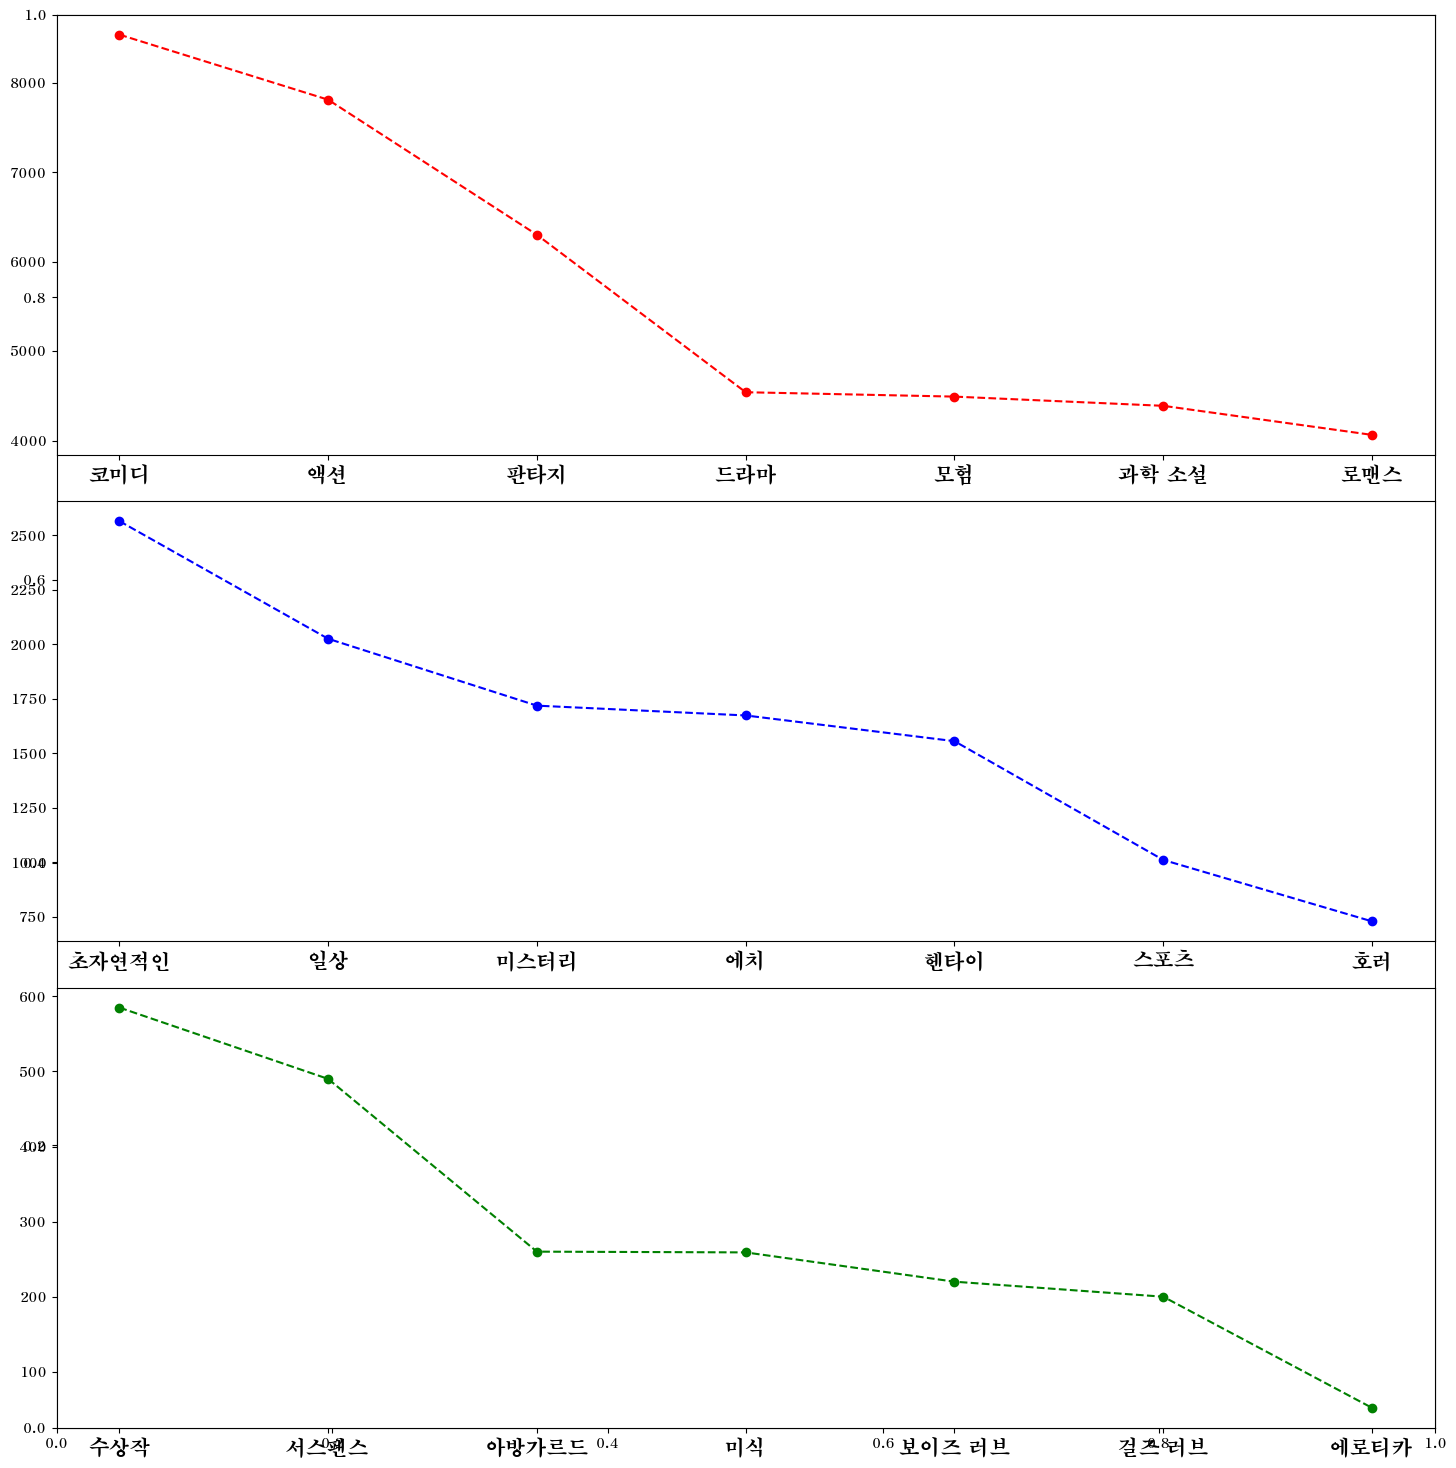

In [181]:
fig, ax = plt.subplots(figsize=(15,15))

x,y=p1.index[0:7], p1.values[0:7]
ax1=fig.add_subplot(311)    
plt.xticks([ i for i in range(7)],x, fontsize=15.0)
plt.plot(x, y,"ro--")


x,y=p1.index[7:14], p1.values[7:14]
ax2=fig.add_subplot(312)  
plt.xticks([ i for i in range(7)],x, fontsize=15.0) 
plt.plot(x,y,"bo--")

x,y=p1.index[14:21], p1.values[14:21]
ax3=fig.add_subplot(313)
plt.xticks([ i for i in range(7)],x, fontsize=15.0)
plt.plot(x,y,"go--")

plt.tight_layout() # 여러 개의 그래프가 겹치지 않게 최소한의 여백 지정해주는 함수
plt.show()

In [182]:
print(f'가장 많은 애니메이션을 제작한 제작사 : {result.T.sum().sort_values().idxmax()} , 총 제작수 : {result.T.sum().sort_values().max()}')

가장 많은 애니메이션을 제작한 제작사 : Aniplex , 총 제작수 : 1402.0


In [183]:
# 애니플렉스가 다룬 애니메이션 장르 검색
p2=result.T[result.T.sum().sort_values().idxmax()].sort_values().tail(10)
p2

Slice of Life     49.0
Mystery           82.0
Adventure         89.0
Sci-Fi           108.0
Romance          113.0
Drama            121.0
Supernatural     130.0
Fantasy          164.0
Comedy           199.0
Action           242.0
Name: Aniplex, dtype: float64

In [184]:
add_col=[]
for i in (p2.keys()) : 
    add_col.append(genre_translation[i])
p2.index=add_col # 키값을 영어에서 한국어로 바꿈

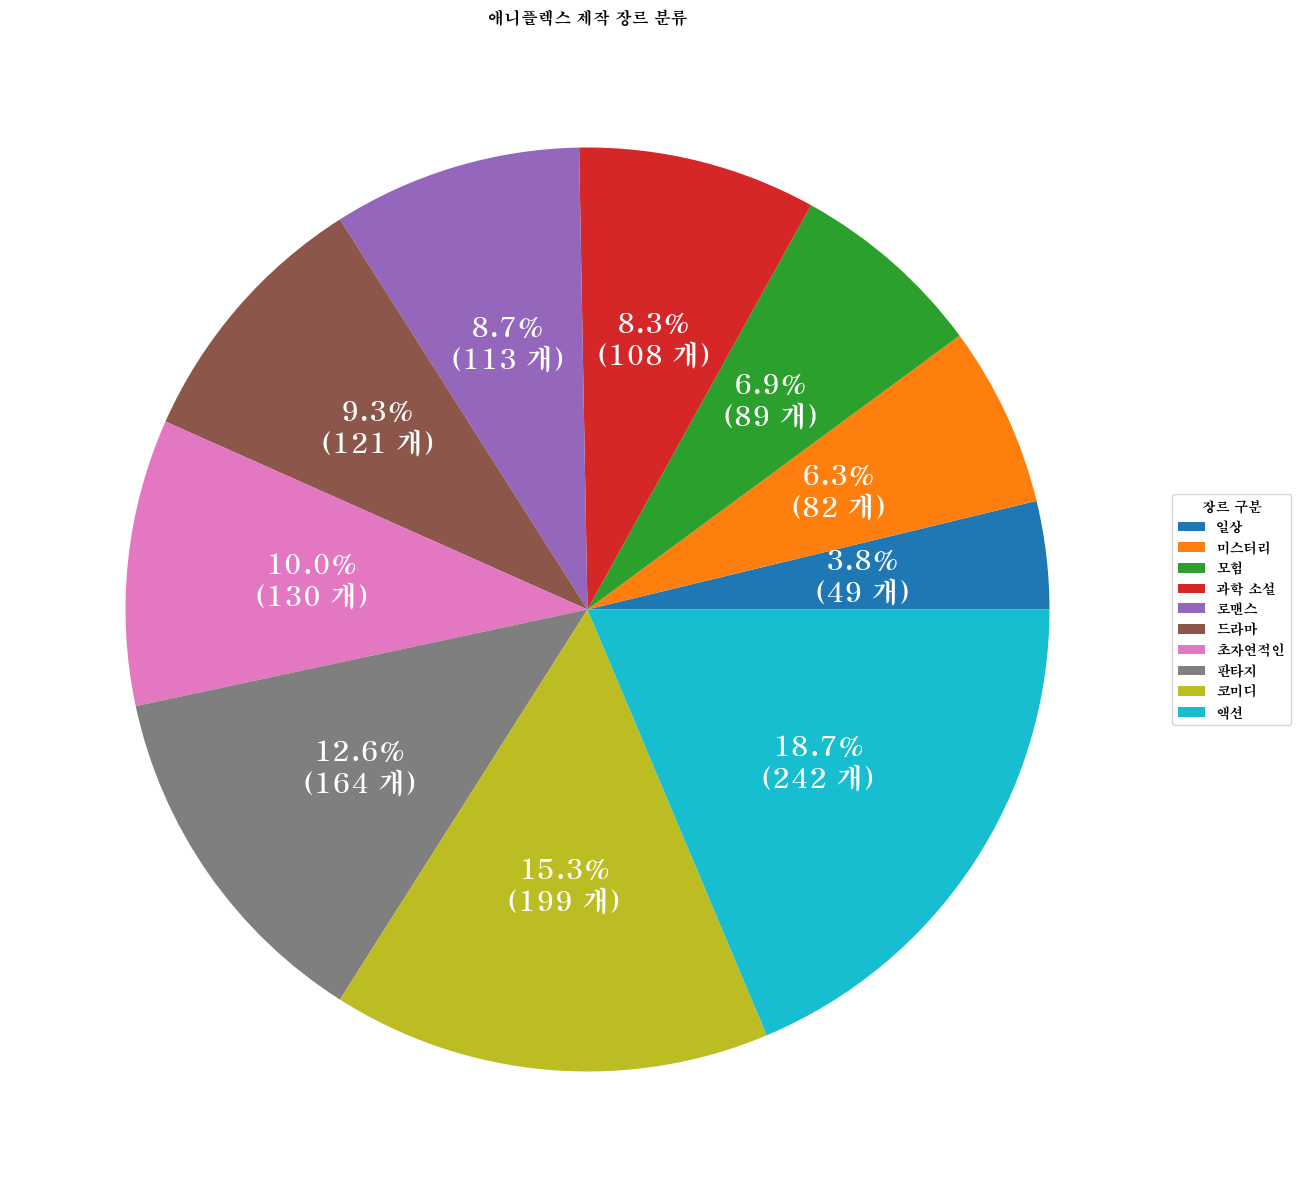

In [185]:
# x=list(p2.index) # 애니플렉스가 다룬 애니메이션 장르를 파이차트로 출력
# y=p2.values
# fig, ax = plt.subplots(figsize=(15,15))
# wedges, texts, autotexts=ax.pie(y, labels=x, textprops=dict(color='w'))
# plt.setp(autotexts, size=20, weight="bold")
# plt.show()



fig, ax = plt.subplots(figsize=(15, 15), subplot_kw=dict(aspect="equal"))

recipe = list(p2.index)

data = p2.values
ingredients = p2.index


def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d} 개)"


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, ingredients,
          title="장르 구분",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=20, weight="bold")

ax.set_title("애니플렉스 제작 장르 분류")

plt.show()

In [186]:
# Hentai 장르를 가장 많이 다룬 제작사 검색(괜한 호기심 발동!)
result["Hentai"].sort_values().idxmax() # Pink Pineapple이 Hentai장르를 가장 많이 다루었다

'Pink Pineapple'

In [187]:
# Pink Pineapple 가 다룬 애니메이션 장르 검색
p3=result.T[result["Hentai"].sort_values().idxmax()].sort_values().tail(10)
p3

Adventure         4.0
Action            5.0
Horror            7.0
Sci-Fi            7.0
Drama            11.0
Comedy           11.0
Romance          16.0
Supernatural     16.0
Fantasy          17.0
Hentai          267.0
Name: Pink Pineapple, dtype: float64

In [188]:
add_col=[]
for i in (p3.keys()) : 
    add_col.append(genre_translation[i])
p3.index=add_col # 키값을 영어에서 한국어로 바꿈
p3

모험         4.0
액션         5.0
호러         7.0
과학 소설      7.0
드라마       11.0
코미디       11.0
로맨스       16.0
초자연적인     16.0
판타지       17.0
헨타이      267.0
Name: Pink Pineapple, dtype: float64

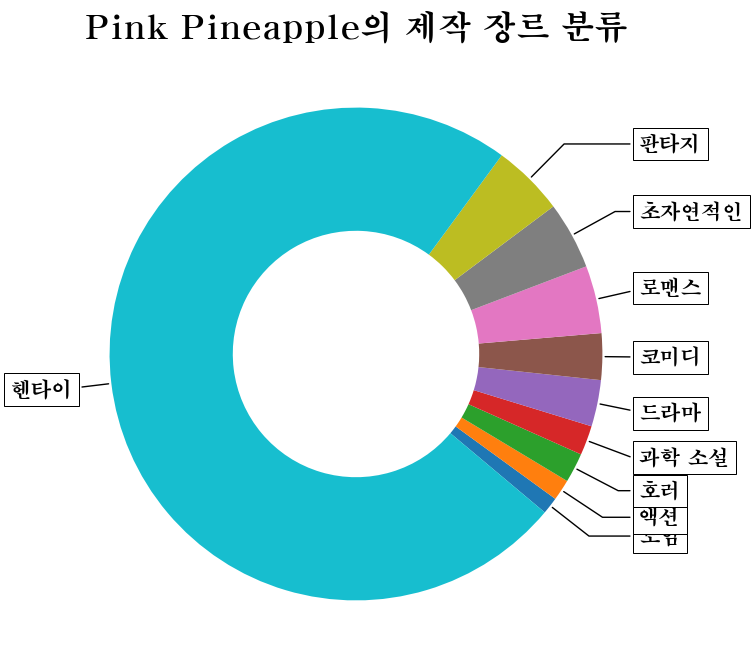

In [191]:
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(aspect="equal"))

recipe = list(p3.index)

data = p3.values

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center", fontsize=15.0)

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.15*np.sign(x), 1.2*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Pink Pineapple의 제작 장르 분류", fontsize=24)

plt.show()